# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import os
import requests
import json
import pandas as pd
import numpy as np
from citipy import citipy
from scipy import stats
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Need to create random lists for lat and lng
lat = []
lng = []

lat = np.random.uniform(low=-90.0, high=90.0, size=1250)
lng = np.random.uniform(low=-180.0, high=180.0, size=1250)

# Zip lat and lng lists
combined_lat_lng = zip(lat, lng)

# Create a list of cities using lat and lng
cities_list = []

for x in combined_lat_lng:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # city is unique add to the list
    if city not in cities_list:
        cities_list.append(city)

len(cities_list)

531

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# setting up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

# empty lists to hold data
city_names = []
city_ids = []
lat_list = []
lng_list = []
temp_list = []
cloud_list = []
humidity_list = []
wind_speed_list = []
max_temp_list = []
country_list = []
date_list = []

#response_json = requests.get(query_url + cities_list[0]).json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

for city in cities_list:
    
    response_json = requests.get(query_url + city).json()
    
    # try and except, need to account for errors if no data
    
    try:
        city_names.append(response_json["name"])
        
        # Creating a variable to hold city id for print out
        city_id = response_json["id"]
        city_ids.append(city_id)
        
        cloud_list.append(response_json["clouds"]["all"])
        lat_list.append(response_json["coord"]["lat"])
        lng_list.append(response_json["coord"]["lon"])
        temp_list.append(response_json["main"]["temp"])
        humidity_list.append(response_json["main"]["humidity"])
        wind_speed_list.append(response_json["wind"]["speed"])
        max_temp_list.append(response_json["main"]["temp_max"])
        country_list.append(response_json["sys"]["country"])
        date_list.append(response_json["dt"])
        print(f"Processing city: {city}, city id: {city_id}")
    
    except:
        print("City not found.....skipping")

Processing city: puerto ayora, city id: 3652764
City not found.....skipping
Processing city: kupang, city id: 2057087
Processing city: rikitea, city id: 4030556
Processing city: dourbali, city id: 2433055
Processing city: hobart, city id: 2163355
Processing city: siderno, city id: 6540819
Processing city: ushuaia, city id: 3833367
Processing city: jamestown, city id: 5122534
Processing city: tiksi, city id: 2015306
Processing city: wylie, city id: 4743275
Processing city: ribeira grande, city id: 3372707
Processing city: namibe, city id: 3347019
Processing city: seydi, city id: 1218420
Processing city: albany, city id: 5106841
Processing city: nikolskoye, city id: 546105
Processing city: sao joao da barra, city id: 3448903
Processing city: kavieng, city id: 2094342
Processing city: harper, city id: 2276492
Processing city: mataura, city id: 6201424
Processing city: ukiah, city id: 5404476
Processing city: sao miguel do araguaia, city id: 3448455
Processing city: geraldton, city id: 207

Processing city: hofn, city id: 2630299
Processing city: concepcion, city id: 3893894
Processing city: ulladulla, city id: 2145554
Processing city: vao, city id: 2137773
Processing city: avera, city id: 4231997
Processing city: karakol, city id: 1528121
Processing city: bismil, city id: 321031
Processing city: richmond hill, city id: 6122091
Processing city: cabo san lucas, city id: 3985710
Processing city: marawi, city id: 1701054
Processing city: korem, city id: 332746
City not found.....skipping
City not found.....skipping
Processing city: mount gambier, city id: 2156643
Processing city: puerto escondido, city id: 3520994
Processing city: broken hill, city id: 2173911
Processing city: luanda, city id: 2240449
Processing city: bitam, city id: 2401578
Processing city: karratha, city id: 6620339
Processing city: marovoay, city id: 1059507
Processing city: suntar, city id: 2015913
Processing city: college, city id: 5859699
City not found.....skipping
Processing city: sabang, city id: 12

Processing city: christchurch, city id: 2192362
Processing city: kabalo, city id: 215668
Processing city: jieshi, city id: 1805857
Processing city: chagoda, city id: 570086
Processing city: jiwani, city id: 1175712
Processing city: arlit, city id: 2447513
Processing city: itanagar, city id: 1269655
Processing city: jinchang, city id: 1805733
Processing city: flic en flac, city id: 934517
Processing city: yerbogachen, city id: 2012956
Processing city: okato, city id: 2185763
Processing city: oranjemund, city id: 3354071
Processing city: san javier, city id: 2511366
Processing city: dandong, city id: 2037886
City not found.....skipping
Processing city: mattru, city id: 2409215
Processing city: missoula, city id: 5666648
Processing city: hervey bay, city id: 2146219
Processing city: la sarre, city id: 6050194
Processing city: katsuura, city id: 2112309
Processing city: haapiti, city id: 4034438
Processing city: kota bahru, city id: 1736376
City not found.....skipping
Processing city: anto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# output file
output_file = "../output_data/cities.csv"

# create dataframe to hold the information
cities_df = pd.DataFrame({"City": city_names, "Lat": lat_list, "Lng": lng_list, "Temp": temp_list,
                          "Max Temp": max_temp_list, "Humidity": humidity_list,
                          "Cloudiness": cloud_list, "Wind Speed": wind_speed_list,
                          "Country": country_list, "Date": date_list})

cities_df.to_csv(output_file)
cities_df.head(5)

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,82.40,82.40,69,20,18.41,EC,1619718098
1,Kupang,-10.1667,123.5833,76.59,76.59,89,46,6.13,ID,1619718146
2,Rikitea,-23.1203,-134.9692,75.96,75.96,71,95,9.51,PF,1619718073
3,Dourbali,11.8091,15.8632,94.68,94.68,14,11,6.44,TD,1619718146
4,Hobart,-42.8794,147.3294,53.22,54.00,94,90,1.57,AU,1619717934


In [5]:
cities_df.describe()

,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02
mean,16.897914,16.641371,63.231870,63.721728,68.664634,55.888211,7.786606,1.619718e+09
std,34.261928,91.307359,19.918303,19.909229,22.686730,36.373399,4.985164,8.216544e+01
min,-54.800000,-179.166700,-1.710000,-1.710000,4.000000,0.000000,0.090000,1.619718e+09
25%,-12.606600,-60.492700,48.500000,48.990000,55.000000,20.000000,4.030000,1.619718e+09
50%,18.217100,20.053500,68.000000,69.010000,73.500000,67.000000,6.910000,1.619718e+09
75%,46.566650,96.138050,78.810000,79.182500,86.000000,90.000000,10.360000,1.619718e+09
max,78.218600,178.416700,104.290000,104.290000,100.000000,100.000000,33.380000,1.619718e+09


In [6]:
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Temp          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
print(cities_df["Humidity"].describe())
print("There are no cities with humidty over 100%")

count    492.000000
mean      68.664634
std       22.686730
min        4.000000
25%       55.000000
50%       73.500000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64
There are no cities with humidty over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

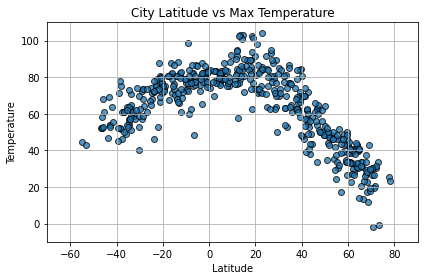

The plot is of Latitude vs Max Temperature
From south and north pole as the latitude gets closer to the equator (Lat 0), the temperature increases


In [72]:
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Max Temperature")
plt.ylim(-10, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsTemp.png", dpi=100)
plt.show()
plt.close()

print("The plot is of Latitude vs Max Temperature")
print("From south and north pole as the latitude gets closer to the equator (Lat 0), the temperature increases")

## Latitude vs. Humidity Plot

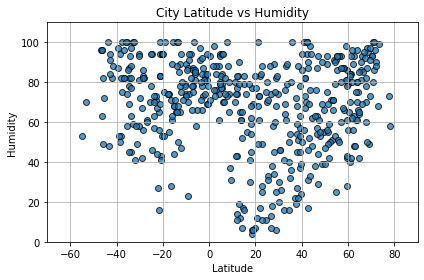

The plot is of Latitude vs Humidity
For this plot, there isn't much of a connection between latitude and humidity 


In [70]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity")
plt.ylim(0, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsHumidity.png", dpi=100)
plt.show()
plt.close()

print("The plot is of Latitude vs Humidity")
print("For this plot, there isn't much of a connection between latitude and humidity")

## Latitude vs. Cloudiness Plot

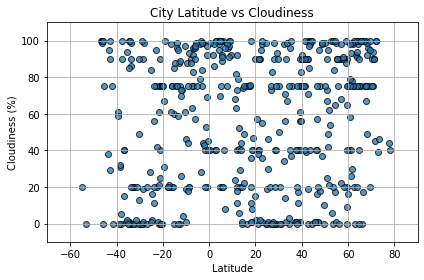

This plot is of Latitude vs Cloudiness
For this plot, there isn't much of a connection between latitude and cloudiness


In [71]:
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")
plt.ylim(-10, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsClouds.png", dpi=100)
plt.show()
plt.close()

print("This plot is of Latitude vs Cloudiness")
print("For this plot, there isn't much of a connection between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

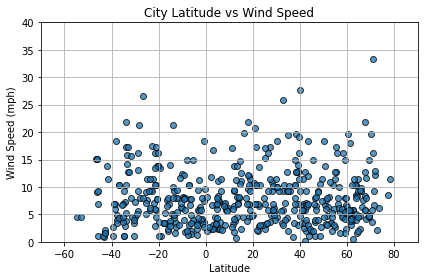

This plot is of latitude vs Wind speed
For this plot, it seems to get windier as the latitude moves away from the equator (lat 0)


In [73]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed")
plt.ylim(0, 40)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsWindSpd.png", dpi=100)
plt.show()
plt.close()

print("This plot is of latitude vs Wind speed")
print("For this plot, it seems to get windier as the latitude moves away from the equator (lat 0)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8822189618047186


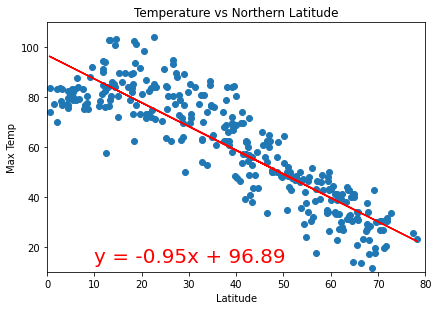

In [77]:
north_hem_df = cities_df[cities_df["Lat"] > 0]
#south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df
# north_hem_df

x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

slope, inter, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=20,color="red")
plt.ylim(10, 110)
plt.xlim(0, 80)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temperature vs Northern Latitude")
plt.savefig("../output_data/Nhem_temp.png", dpi=100)
plt.show()
plt.close()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8822189618047186


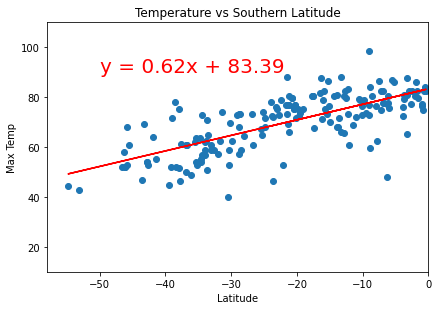

In [78]:
#north_hem_df = cities_df[cities_df["Lat"] > 0]
south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df


s_x_values = south_hem_df["Lat"]
s_y_values = south_hem_df["Max Temp"]

s_slope, s_inter, s_rvalue, s_pvalue, s_std_err = stats.linregress(s_x_values, s_y_values)
s_regress_values = s_x_values * s_slope + s_inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_inter,2))
plt.scatter(s_x_values, s_y_values)
plt.plot(s_x_values,s_regress_values,"r-")
plt.annotate(line_eq,(-50, 90),fontsize=20,color="red")
plt.ylim(10, 110)
plt.xlim(-58, 0)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temperature vs Southern Latitude")
plt.savefig("../output_data/Shem_temp.png", dpi=100)
plt.show()
plt.close()

# Both the Northern and Southern hemispheres are showing the same relationship, as you move away from the equator the temperture decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18261381600721138


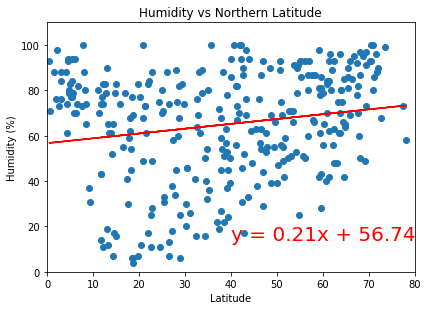

In [79]:
north_hem_df = cities_df[cities_df["Lat"] > 0]
#south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df
# north_hem_df

x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

slope, inter, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=20,color="red")
plt.ylim(0, 110)
plt.xlim(0, 80)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Northern Latitude")
plt.savefig("../output_data/Nhem_humidity.png", dpi=100)
plt.show()
plt.close()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03117355421203871


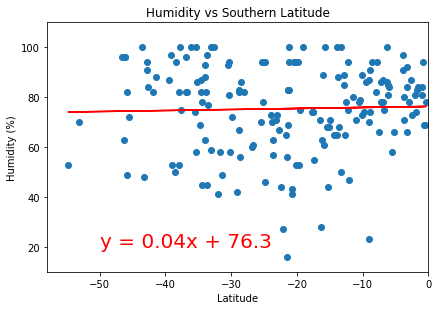

In [80]:
#north_hem_df = cities_df[cities_df["Lat"] > 0]
south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df


s_x_values = south_hem_df["Lat"]
s_y_values = south_hem_df["Humidity"]

s_slope, s_inter, s_rvalue, s_pvalue, s_std_err = stats.linregress(s_x_values, s_y_values)
s_regress_values = s_x_values * s_slope + s_inter

print(f"The r-value is: {s_rvalue}")
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_inter,2))
plt.scatter(s_x_values, s_y_values)
plt.plot(s_x_values,s_regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=20,color="red")
plt.ylim(10, 110)
plt.xlim(-58, 0)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Southern Latitude")
plt.savefig("../output_data/Shem_humidity.png", dpi=100)
plt.show()
plt.close()

# The Northern hemisphere there is a positive correlation, as the latitude moves away from the equator, humidity increases.  In the Southern hemisphere there looks to be very little to none correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09805956441981656


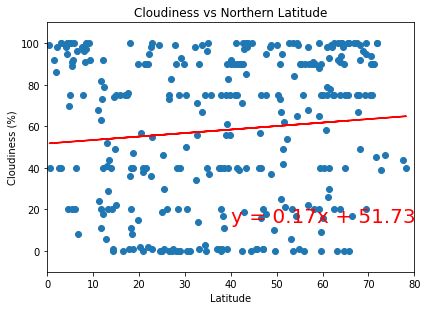

In [81]:
north_hem_df = cities_df[cities_df["Lat"] > 0]
#south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df
# north_hem_df

x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

slope, inter, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=20,color="red")
plt.ylim(-10, 110)
plt.xlim(0, 80)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Northern Latitude")
plt.savefig("../output_data/Nhem_cloud.png", dpi=100)
plt.show()
plt.close()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22564073466773069


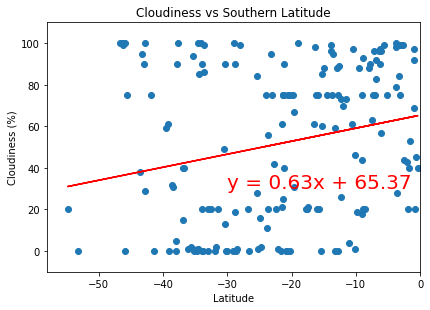

In [82]:
#north_hem_df = cities_df[cities_df["Lat"] > 0]
south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df


s_x_values = south_hem_df["Lat"]
s_y_values = south_hem_df["Cloudiness"]

s_slope, s_inter, s_rvalue, s_pvalue, s_std_err = stats.linregress(s_x_values, s_y_values)
s_regress_values = s_x_values * s_slope + s_inter

print(f"The r-value is: {s_rvalue}")
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_inter,2))
plt.scatter(s_x_values, s_y_values)
plt.plot(s_x_values,s_regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=20,color="red")
plt.ylim(-10, 110)
plt.xlim(-58, 0)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Southern Latitude")
plt.savefig("../output_data/Shem_cloud.png", dpi=100)
plt.show()
plt.close()

# From the plots, it looks to be more cloudy in the northern hemisphere then the southern hemisphere.  In the southern hemisphere, as the latitude moves away from the equator (lat 0), the less cloudy it is.  In the northern hemisphere, there seems to be no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03894102186991103


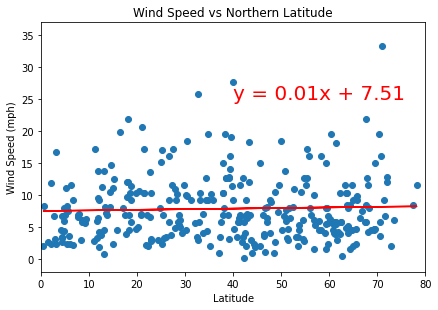

In [83]:
north_hem_df = cities_df[cities_df["Lat"] > 0]
#south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df
# north_hem_df

x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

slope, inter, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=20,color="red")
plt.ylim(-2, 37)
plt.xlim(0, 80)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Northern Latitude")
plt.savefig("../output_data/Nhem_wind.png", dpi=100)
plt.show()
plt.close()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10171060435276175


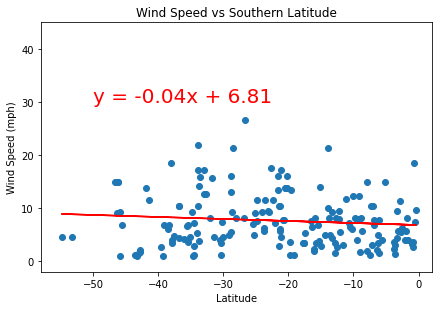

In [84]:
#north_hem_df = cities_df[cities_df["Lat"] > 0]
south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df


s_x_values = south_hem_df["Lat"]
s_y_values = south_hem_df["Wind Speed"]

s_slope, s_inter, s_rvalue, s_pvalue, s_std_err = stats.linregress(s_x_values, s_y_values)
s_regress_values = s_x_values * s_slope + s_inter

print(f"The r-value is: {s_rvalue}")
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_inter,2))
plt.scatter(s_x_values, s_y_values)
plt.plot(s_x_values,s_regress_values,"r-")
plt.annotate(line_eq,(-50, 30),fontsize=20,color="red")
plt.ylim(-2, 45)
plt.xlim(-58, 2)
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Southern Latitude")
plt.savefig("../output_data/Shem_wind.png", dpi=100)
plt.show()
plt.close()

# The linear regression for both the northern and southern hemisphere is showing little correlation between wind speed and latitude, but there is a slight increase of wind speed in the southern hemisphere as the latitude moves away from the equator (lat 0)